In [1]:
# imports 

import numpy as np, pandas as pd, tensorflow as tf, seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt 

print('Done.')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Done.


In [2]:
alphabets_url = '/kaggle/input/a-z-dataset/A_Z Handwritten Data.csv'
print('Done.')

Done.


In [3]:
#Function to load a-z dataset for alphabets from a-z 
def load_alphabets_dataset(alphabets_url_): 
    images_, labels_ = [], [] 
    for line in open(alphabets_url_): 
        line_ = line.split(',') 
        labels_.append(line_[0]) 
        img_ = np.array([int(image_data_) for image_data_ in line_[1:]])
        images_.append(img_.reshape(28, 28)) 
    return [np.array(images_, dtype = 'float32'), np.array(labels_, dtype = 'int') ]


#Function to load the digits dataset 
def load_digits_dataset(): 
    from keras.datasets import mnist 
    ((train_x_, train_y_), (test_x_, test_y_))  = mnist.load_data() 
    x_ = np.vstack([train_x_, test_x_])
    y_ = np.hstack([train_y_, test_y_])
    return (x_, y_)


#Function to get the datasets 

def get_dataset(size_ = (28, 28)): 
    alphabets_x, alphabets_y = load_alphabets_dataset(alphabets_url) 
    digits_x, digits_y = load_digits_dataset()
    print(len(alphabets_x))
    alphabets_y += 10 
    x_ = np.vstack([alphabets_x, digits_x])
    y_ = np.hstack([alphabets_y, digits_y]) 
    print(f"Dataset images size : {x_.shape} \n Dataset ouput size : {y_.shape}") 
    return [x_, y_] 

print('Done.')

Done.


In [4]:
dataX, dataY = get_dataset(size_ = (28, 28))
dataX.shape, dataY.shape

11490434/11490434 [==============================] - 1s 0us/step
372451
Dataset images size : (442451, 28, 28) 
 Dataset ouput size : (442451,)


((442451, 28, 28), (442451,))

In [5]:
def prepare_pixels(train, test):
    return train/255.0, test/255.0

print('Done.')

Done.


In [6]:
dataX = dataX.reshape((dataX.shape[0], 28, 28, 1)) 
print(dataX.shape)

from sklearn.model_selection import train_test_split 

trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size = 0.15)

trainX.shape, testX.shape, trainY.shape, testY.shape

(442451, 28, 28, 1)


((376083, 28, 28, 1), (66368, 28, 28, 1), (376083,), (66368,))

In [7]:
labels = list(set(np.unique(trainY)))

print(len(labels))
# one hot encode the lable data 
trainY = keras.utils.to_categorical(trainY, num_classes = 36)
testY = keras.utils.to_categorical(testY, num_classes = 36) 

trainX.shape, testX.shape, trainY.shape, testY.shape

36


((376083, 28, 28, 1), (66368, 28, 28, 1), (376083, 36), (66368, 36))

In [8]:
# scale the data 
trainX, testX = prepare_pixels(trainX, testX) 
trainX.shape, testX.shape

((376083, 28, 28, 1), (66368, 28, 28, 1))

In [9]:
# define the model
def get_model():
    # define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
            filters = 64, kernel_size = (3,3),
            activation = 'relu',  input_shape = (28, 28, 1)
        ),
         tf.keras.layers.Conv2D(
            filters = 80, kernel_size = (3,3),  activation = 'relu',
        ),
        tf.keras.layers.Conv2D(
            filters = 96, kernel_size = (3,3),  activation = 'relu',
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
         tf.keras.layers.Conv2D(
            filters = 112, kernel_size = (3,3),  activation = 'relu',
        ),
        tf.keras.layers.Conv2D(
            filters = 128, kernel_size = (3,3),  activation = 'relu',
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            256, activation = 'relu',
        ),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(
            128, activation = 'relu',
        ),
        tf.keras.layers.Dense(
            64, activation='relu'
        ),
         tf.keras.layers.Dense(
            36, activation='softmax'
        ),
    ])

    # compile the model
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,),
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
    )
    print("Summary of the model : ", model.summary()) 
    return model


print('Done.')

Done.


In [10]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((376083, 28, 28, 1), (376083, 36), (66368, 28, 28, 1), (66368, 36))

In [11]:
model = get_model() 

history = model.fit(
    trainX, trainY, batch_size = 32, epochs = 50, validation_data = (testX, testY)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 80)        46160     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 96)        69216     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 112)         96880     
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         129152    
                                                        

In [12]:
model.save('ocr-revised.keras')
model.save('ocr-revised.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11 characters segmented and saved in /content/output_characters
11


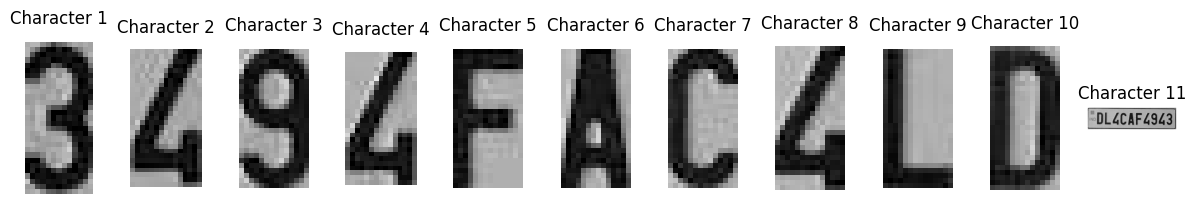

In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def add_white_border(image, border_size=2):
    # Add a white border around the image
    bordered_image = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size,
                                        cv2.BORDER_CONSTANT, value=255)
    return bordered_image

def segment_and_save_characters(image_path, output_directory="output_characters", boundary_thickness=2):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (noise)
    min_area = 100
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Extract individual character images and save them
    character_images = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        char_image = image[y:y+h, x:x+w]

        # Add a boundary around the character image with white color
        char_image_with_boundary = add_white_border(char_image, border_size = 2)

        # Save the character image with boundary
        output_path = os.path.join(output_directory, f"character_{i + 1}.png")
        cv2.imwrite(output_path, char_image_with_boundary)

        # Append the character image to the list
        character_images.append(char_image_with_boundary)

    print(f"{len(contours)} characters segmented and saved in {output_directory}")
    print(len(character_images))
    return character_images

# Example usage:
image_path = "/kaggle/input/images/number-plate-1.jpeg"  # Replace with the path to your image in Colab
output_directory = "/content/output_characters"  # Replace with the desired output directory
boundary_thickness = 2  # Adjust the boundary thickness as needed
character_images = segment_and_save_characters(image_path, output_directory, boundary_thickness)

# Plot the character images
plt.figure(figsize=(15, 5))
for i, char_image in enumerate(character_images):
    plt.subplot(1, len(character_images), i + 1)
    plt.imshow(char_image, cmap='gray')
    plt.title(f"Character {i + 1}")
    plt.axis('off')

plt.show()

In [14]:
import cv2
import numpy as np

def resize_images(images, target_size=(28, 28)):
    resized_images = [cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC) for image in images]
    return np.array(resized_images)

# Example usage:
# Assuming you have an array 'images_array' of shape (num_images, height, width)
images = resize_images(character_images, target_size=(28, 28))
images = np.expand_dims(np.array(images), axis = -1)

In [15]:
images.shape

(11, 28, 28, 1)

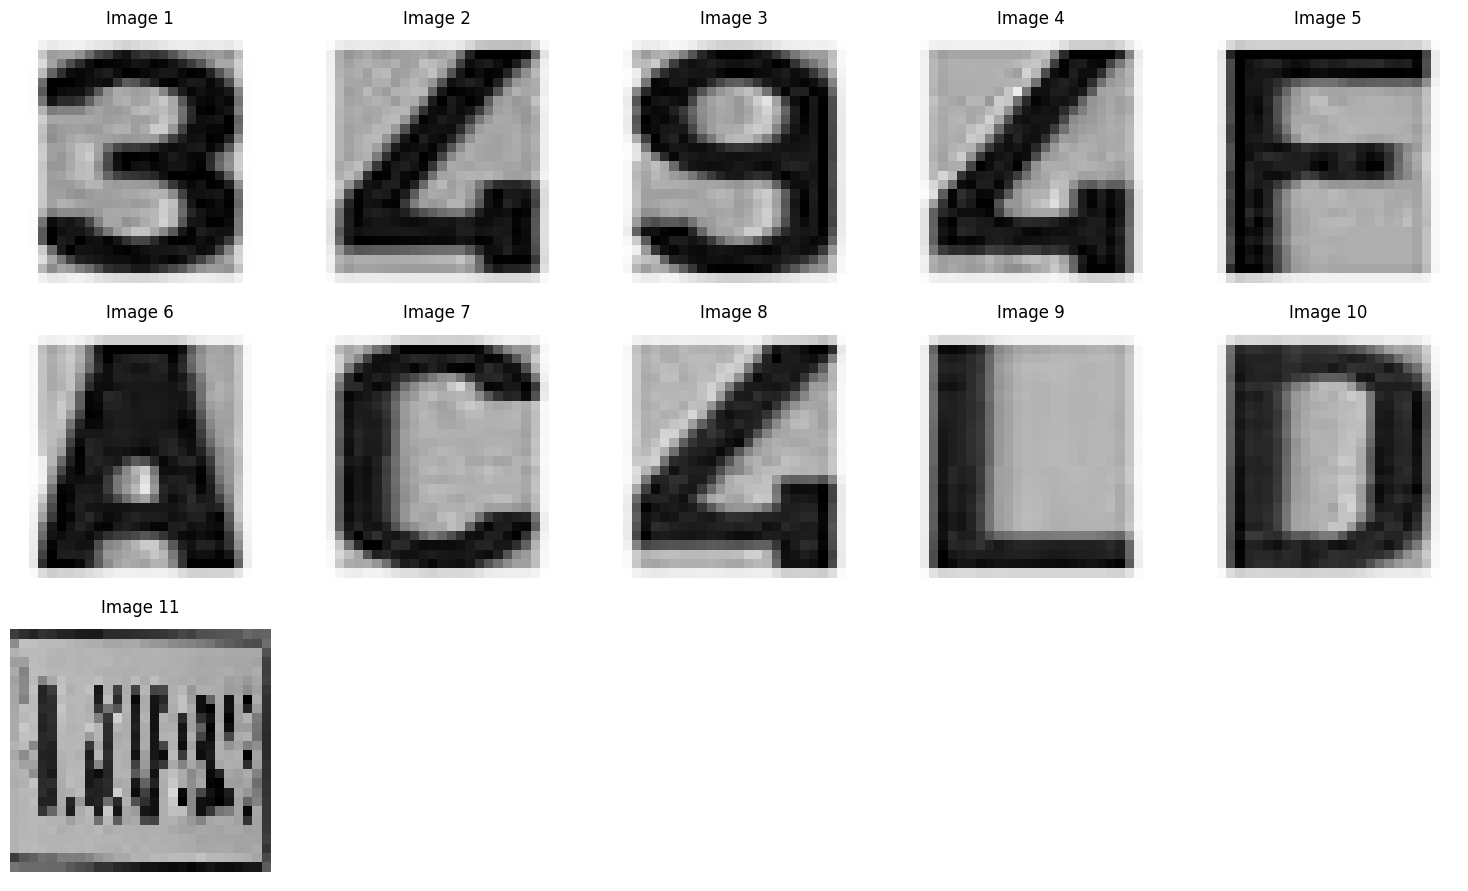

In [16]:
import matplotlib.pyplot as plt

def plot_images(resized_images_array, num_cols=5):
    num_images = len(resized_images_array)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 3 * num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(resized_images_array[i], cmap='gray')
        plt.title(f"Image {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'resized_images_array' is your NumPy array of resized images
plot_images(images, num_cols=5)

In [17]:
preds = model.predict(images)

1/1 [==============================] - 0s 210ms/step


In [18]:
digits = np.argmax(preds, axis = 1)
characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

result = ''

for digit in digits : 
    result += characters[digit]

result

'YYYYYYYYYYY'

In [19]:
!pip install imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=da0e71576ce15e4038f45e266e5f823253925064a7f11fd8b457b3171d55a8fd
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


1/1 [==============================] - 0s 18ms/step


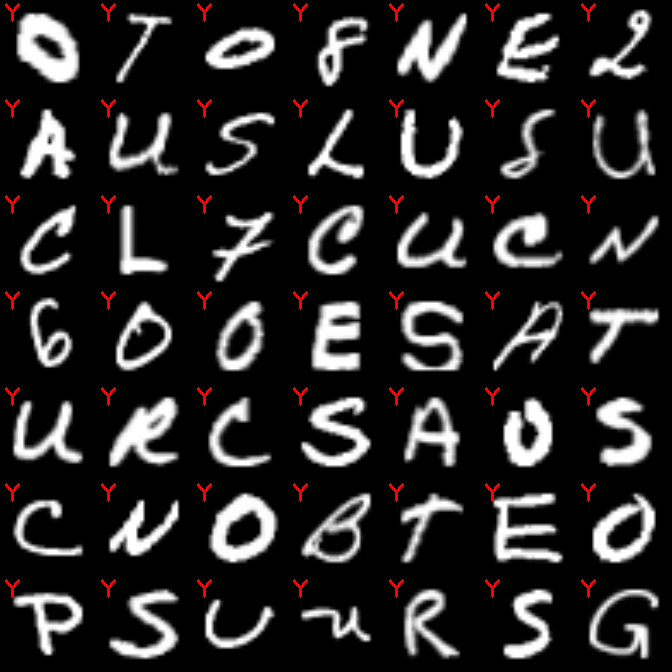

In [20]:
from imutils import build_montages
from IPython.display import Image, display

images, output = [], ''

# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = characters[prediction[0]]
    output += label

    image = (testX[i] * 255).astype("uint8")
    color = (0, 255, 0)

    if prediction[0] != np.argmax(testY[i]):
        color = (0, 0, 255)

    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
    images.append(image)

# Build the montage
montage = build_montages(images, (96, 96), (7, 7))[0]

# Save the montage as an image
cv2.imwrite('/kaggle/working/montage.png', montage)

# Display the saved image
display(Image(filename='/kaggle/working/montage.png'))
